## Opencv

In [1]:
import cv2

In [3]:
# loading Image
img = cv2.imread('chessboard.jpg', cv2.IMREAD_UNCHANGED)
img

# cv2.IMREAD_GRAYSCALE
# cv2.IMREAD_COLOR -> rgb
# cv2.IMREAD_UNCHANGED -> rgba

In [4]:
(h, w, d) = img.shape
print(f"Width={w}, Hieght={h}, Depth={d}")

Width=768, Hieght=432, Depth=3


In [6]:
cv2.imshow('chess', img)
k = cv2.waitKey(0) # 0 ms means wait untill a keystroke
if k==27:
    cv2.destroyAllWindows()
elif k==ord('s'):
    cv2.imwrite("edited_chess.jpg", img)
    cv2.destroyAllWindows()  

In [7]:
fixed_resized = cv2.resize(img, (300, 300)) # fixed resize  without considering the aspect ratio

In [8]:
aspect_ratio = 300.0/w
resized_aspect_ratio = cv2.resize(img, (300, int(h*aspect_ratio)))

In [9]:
# resized = imutils.resize(image, width=300)

## Matplotlip

In [10]:
from matplotlib import pyplot as plt 

In [11]:
# opencv uses legacy standart BGR mode not RGP

In [12]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [13]:
r, g, b = img_rgb[30, 27]
print(f'r={r}, g={g}, b={b}')

r=255, g=255, b=255


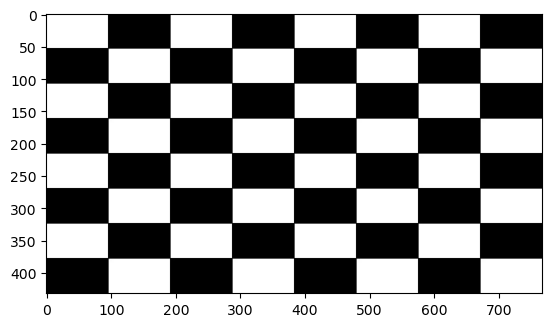

In [14]:
plt.figure()
plt.imshow(img_rgb)
# plt.show()

## Numpy

In [15]:
import numpy as np

In [16]:
arr = np.arange(0, 16)
print(arr.shape, arr)
reshaped_arr = arr.reshape((4, 2, 2))
reshaped_arr.shape
# reshaped_arr

(16,) [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


(4, 2, 2)

In [17]:
reshaped_arr[...,1] # EQV. reshaped_arr[:,:,1] 

array([[ 1,  3],
       [ 5,  7],
       [ 9, 11],
       [13, 15]])

In [18]:
reshaped_arr[0:2,...] # EQV. reshaped_arr[0:2, :,:] 

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

In [19]:
reshaped_arr[..., -1]

array([[ 1,  3],
       [ 5,  7],
       [ 9, 11],
       [13, 15]])

In [20]:
arr[[0, 1, 2, 3, 4]]

array([0, 1, 2, 3, 4])

In [21]:
# arr[[True, True, False, False, False, False, False, ... ]]
arr[arr<=4]

array([0, 1, 2, 3, 4])

In [22]:
a = np.arange(1, 17).reshape((4, 4))
b = np.arange(11, 27).reshape((4, 4))
b = a
print(f"a={a}")
print(f"b={b}")

a=[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
b=[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]


In [23]:
a = np.arange(1, 17).reshape((4, 4))
b = a
b[:] = np.arange(11, 27).reshape((4, 4))
print(f"a={a}")
print(f"b={b}")

a=[[11 12 13 14]
 [15 16 17 18]
 [19 20 21 22]
 [23 24 25 26]]
b=[[11 12 13 14]
 [15 16 17 18]
 [19 20 21 22]
 [23 24 25 26]]


In [24]:
# Broadcasting
""" A set of arrays is said to be broadcastable if the above rules produce a valid result and one
of the following is true
- Arrays have exactly the same shape.
- Arrays have the same number of dimensions and the length of each
dimension is either a common length or 1
- Array having too few dimensions can have its shape prepended with a
dimension of length 1, so that the above stated property is true.
"""

' A set of arrays is said to be broadcastable if the above rules produce a valid result and one\nof the following is true\n- Arrays have exactly the same shape.\n- Arrays have the same number of dimensions and the length of each\ndimension is either a common length or 1\n- Array having too few dimensions can have its shape prepended with a\ndimension of length 1, so that the above stated property is true.\n'

In [25]:
a = np.array([[0.0, 0.0, 0.0],
              [10.0, 10.0, 10.0],
              [20.0, 20.0, 20.0],
              [30.0, 30.0, 30.0]])
print(f"a shape", a.shape)
b = np.array([1.0, 2.0, 3.0])
print(f"b shape", b.shape)
print(f"a+b:\n", a+b)

a shape (4, 3)
b shape (3,)
a+b:
 [[ 1.  2.  3.]
 [11. 12. 13.]
 [21. 22. 23.]
 [31. 32. 33.]]


### Draw Shapes

In [26]:
# 1. Line: Pass starting and ending coordinates of line, color, line thickness.
img_lined = cv2.line(img, (0, 0), (512, 512), (2500, 0, 0), 5) # not red it's BGR

In [27]:
# 2. Rectangle: Pass top-left corner and bottom-right corner of rectangle, color, line thickness.
img_rectangled = cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)

In [28]:
# 3. Circle: Pass center coordinates and radius, color.
img_circled = cv2.circle(img,(447,63), 63, (0,0,255), -1)

In [31]:
# 4. Add Text: pass bottom-left corner where data starts, Font type, Font Scale(size of font), color, thickness, lineType
font = cv2.FONT_HERSHEY_SIMPLEX
img_circled_texted = cv2.putText(img, 'OpenCV', (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

### OpenCV Image Processing

In [32]:
# Image Thresholding
# Image, threshold value Expression, maximum Value to replace with, threshold TYPE
thresholdedVal, thresholdedImg = cv2.threshold(img_rgb, 127, 255, cv2.THRESH_BINARY)
thresholdedVal

127.0

In [34]:
# Median Filter
# consumes Image, Kernel Size 
cv2.medianBlur(img_rgb, 5) # 5 means (5, 5)

In [35]:
# Gaussian Filter
# consumes Image, kernael size, ?
cv2.GaussianBlur(img_rgb, (3, 3), 0)

In [ ]:
# There are many other functions available as well such as: cv2.boxfilter , cv2.erode(), cv2.Laplacian() and so on.

# THE END